# Aula 5 - Hipóteses mais complexas

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Hipóteses mais complexas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_____

## 1) Hipóteses mais complexas

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados bem simples do próprio sklearn (submódulo [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)):


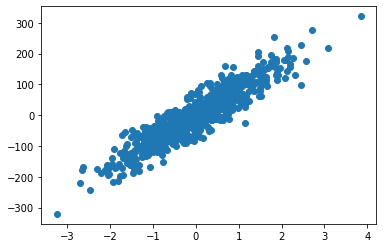

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

plt.scatter(X, y)
plt.show()

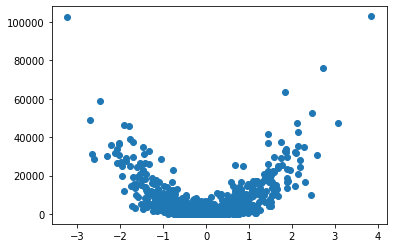

In [3]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

Podemos fazer uma regressão linear...

Intercepto (b0): 7279.765399809274
Demais parâmetros (b1, ..., bn): [1303.44379459]

Modelo treinado:


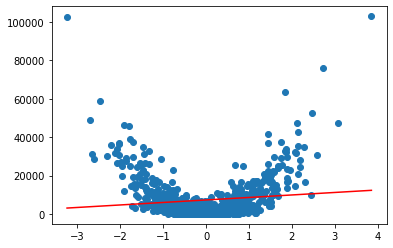

Métricas de treino:

R^2: 0.01
MAE: 7181.56
RMSE: 10802.78

Métricas de teste:

R^2: -0.05
MAE: 8121.31
RMSE: 13395.52


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*x_plot

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrado que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

Intercepto (b0): 934.4564684580082
Demais parâmetros (b1, ..., bn): [6661.31189456]

Modelo treinado:


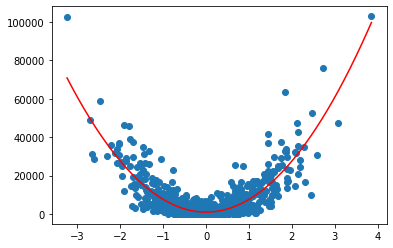

Métricas de treino:

R^2: 0.73
MAE: 3581.64
RMSE: 5636.74

Métricas de teste:

R^2: 0.73
MAE: 4326.26
RMSE: 6778.47


In [5]:
# isso a feature z = x^2
# note: isso é um PRE PROCESSAMENTO DOS DADOS!!! nao to mexendo em NADA do estimador
Z = X**2

# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o Z ao inves do X
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [6]:
X_df = pd.DataFrame(X, columns=["X"])

In [7]:
X_df

,X
0,-1.197878
1,-1.024388
2,-0.269407
3,0.384065
4,-0.107030
...,...
695,-0.825497
696,0.081874
697,0.012592
698,1.882024


In [8]:
X_df["Z"] = X_df["X"]**2

In [9]:
X_df

,X,Z
0,-1.197878,1.434911
1,-1.024388,1.049370
2,-0.269407,0.072580
3,0.384065,0.147506
4,-0.107030,0.011455
...,...,...
695,-0.825497,0.681446
696,0.081874,0.006703
697,0.012592,0.000159
698,1.882024,3.542016


Intercepto (b0): 927.9689134531218
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


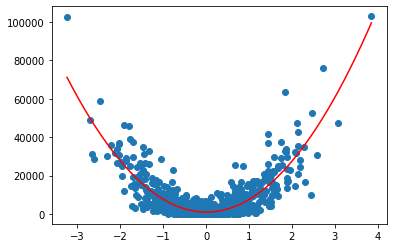

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [10]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot) + reg_lin.coef_[1]*(x_plot**2)

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

In [11]:
X_df["A"] = X_df["X"]**3
X_df["B"] = X_df["X"]**4

In [12]:
X_df

,X,Z,A,B
0,-1.197878,1.434911,-1.718849,2.058971e+00
1,-1.024388,1.049370,-1.074962,1.101177e+00
2,-0.269407,0.072580,-0.019554,5.267863e-03
3,0.384065,0.147506,0.056652,2.175810e-02
4,-0.107030,0.011455,-0.001226,1.312284e-04
...,...,...,...,...
695,-0.825497,0.681446,-0.562531,4.643681e-01
696,0.081874,0.006703,0.000549,4.493523e-05
697,0.012592,0.000159,0.000002,2.514399e-08
698,1.882024,3.542016,6.666161,1.254588e+01


Intercepto (b0): 939.9766852933662
Demais parâmetros (b1, ..., bn): [  26.65263951 6632.87907468  -36.92940233   10.0586674 ]

Modelo treinado:


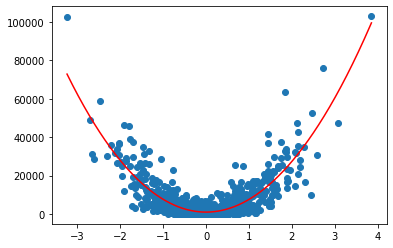

Métricas de treino:

R^2: 0.73
MAE: 3581.20
RMSE: 5636.02

Métricas de teste:

R^2: 0.73
MAE: 4321.62
RMSE: 6722.47


In [13]:
# ======================================

from sklearn.model_selection import train_test_split

# note que aqui tamos usando o X_df (com as duas variaveis) ao inves do X
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

y_plot = (reg_lin.intercept_ + reg_lin.coef_[0]*(x_plot)
          + reg_lin.coef_[1]*(x_plot**2) + reg_lin.coef_[2]*(x_plot**3)
          + reg_lin.coef_[3]*(x_plot**4))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

O procedimento acima é bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é um exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo.

Lembre-se de fitar o transformador sempre nos dados de treino, apenas! Neste caso, não faz muita diferença, mas, para nos acostumarmos a isso, vamos fazer aqui também!

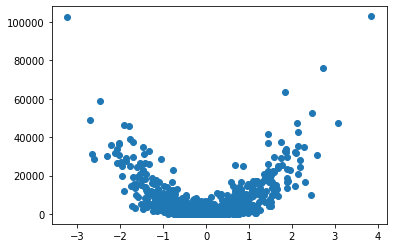

In [14]:
X, y = make_regression(n_samples = 700, n_features = 1,
                       noise = 35, tail_strength = 50,
                       random_state = 42)

y = y**2

plt.scatter(X, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False) #Instanciar

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [ ]:
vars(pf)

In [ ]:
pf.n_features_in_

In [ ]:
pf.n_output_features_

In [ ]:
# das duas features que teremos depois da transformação
# a primeira tem grau 1
# a segunda tem grau 2

pf.powers_

In [ ]:
X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

In [ ]:
X_train_transf

In [ ]:
X_test_transf

Tudo numa unica célula:

Número original de features: 1
Número de features no espaço transformado: 2


Intercepto (b0): 927.9689134531209
Demais parâmetros (b1, ..., bn): [ -65.6131123  6667.88666831]

Modelo treinado:


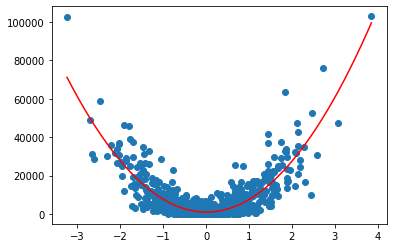

Métricas de treino:

R^2: 0.73
MAE: 3581.93
RMSE: 5636.39

Métricas de teste:

R^2: 0.73
MAE: 4331.75
RMSE: 6772.88


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

# como temos uma unica feature, dá pra plotar o modelo (hipótese final)
print("\nModelo treinado:")

x_plot = np.linspace(X.min(), X.max(), 1000)

# pra plotar a hipotese automaticamente
# y = bo + b1*x^1 + b2*x^2 + .... + bn*x^n

# y_plot = reg_lin.intercept_

# for i in range(len(reg_lin.coef_)):
    
#     y_plot = y_plot + reg_lin.coef_[i]*(x_plot**(i+1))

y_plot = reg_lin.intercept_

for n, b_n in enumerate(reg_lin.coef_):
    
    y_plot = y_plot + b_n*(x_plot**(n+1))

plt.plot(x_plot, y_plot, color="red")

# dados
plt.scatter(X, y)

plt.show()

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("Métricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

### Então podemos pensar que quanto mais features melhor será o nosso modelo?

**Maldição da dimensionalidade**

Este fenômeno afirma que com um número fixo de amostras de treinamento, o poder preditivo médio (esperado) de um classificador ou regressor aumenta primeiro à medida que o número de dimensões ou características utilizadas aumenta, mas além de uma certa dimensionalidade, começa a deteriorar-se em vez de melhorar de forma constante. Este aumento na dimensionalidade do problema pode se refletir no overfitting de um modelo. Vamos ver isso claramente?

In [17]:
# prototipo pra salvar resultados

# resultados = {"num_features" : [1, 2, 3],
#               "mae_train" : [425432, 454253324, 435645654676798],
#               "mae_test" : [42424325, 5434234253, 435645654676798]}

# pd.DataFrame(resultados)

Prototipo do que fizemos abaixo

In [18]:
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

In [19]:
resultados["num_features"].append(4)
resultados["mae_train"].append(5453435)
resultados["mae_test"].append(45345345)

In [ ]:
resultados

Agora sim:

In [ ]:
# dicionario de resultados do experimento
resultados = {"num_features" : [],
              "mae_train" : [],
              "mae_test" : []}

for grau in range(1, 16):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================

    pf = PolynomialFeatures(degree=grau, include_bias=False)

    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("Métricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    
    print()
    print("#"*80)
    print()
    
    # ======================================
    
    resultados["num_features"].append(pf.n_output_features_)
    resultados["mae_train"].append(mean_absolute_error(y_train, y_pred_train))
    resultados["mae_test"].append(mean_absolute_error(y_test, y_pred_test))

In [ ]:
# dataframe de resultados do experimento

df_resultados = pd.DataFrame(resultados)

In [ ]:
df_resultados

In [ ]:
df_resultados.describe()

In [ ]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados["num_features"], df_resultados["mae_train"], label="MAE train")
plt.plot(df_resultados["num_features"], df_resultados["mae_test"], label="MAE test")

plt.legend()
plt.show()

In [ ]:
plt.title("Tradeoff viés-variância")

plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_train"], label="MAE train")
plt.plot(df_resultados[:11]["num_features"], df_resultados[:11]["mae_test"], label="MAE test")

plt.legend()
plt.show()

_____________
_____________
_____________

Agora que já entendemos a técnica em um dataset bem simples, vamos voltar pra um dataset real!

## EXERCÍCIO

Vamos voltar pros dados da precificação de casas -- ali, o poly_features se mostrará ainda mais útil! Treine um modelo utilizando o PolynomialFeatures com degree igual a 2 e faça sua avaliação.

In [ ]:
df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

_____________
_____________
_____________

Com quantas features o modelo final foi construído?

Nossa hipótese é:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{702} x_{702}$$

Ou seja, temos um modelo **com muitos parâmetros**, ou seja, **muito complexo!**

Com tantos parâmetros assim, há muitos **graus de liberdade** pra que a hipótese se ajuste até às particularidades da base de treino... 

O resultado é evidente: temos um modelo altamente **overfitado**, dado o número enorme de features após o transformer -- e isso porque estamos utilizando apenas features quadráticas, imagine se tivéssemos usado features de grau maior!

É de se imaginar que muitas destas features não deveriam estar aí, não é mesmo?

Oras, uma forma interessante de eliminar features é fazendo o que chamamos de **feature selection**.

A ideia é a seguinte: gostaríamos sim de introduzir features quadráticas, aumentando um pouco a complexidade da hipótese, **mas não tanto!**. 

E é isso que conseguiremos fazer com as técnicas de **regularização**.

Antes, vamos chutar mais o balde...

In [ ]:
# uma saida, é limitar a transformação

df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [ ]:
df = pd.read_csv("house_prices.csv")

# incluindo apenas features numericas, jogando fora os NaNs
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

# ======================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================
# passo adicional: criando features polinomiais
# pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

# pra gente se acostumar: fit só em dados de treino!!!!
pf.fit(X_train)

print(f"Número original de features: {pf.n_features_in_}")
print(f"Número de features no espaço transformado: {pf.n_output_features_}\n\n")

# redefinindo as features de treino e de teste
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

# ======================================

from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()

# ======================================

reg_lin.fit(X_train, y_train)

print(f"Intercepto (b0): {reg_lin.intercept_}")
print(f"Demais parâmetros (b1, ..., bn): {reg_lin.coef_}")

# ======================================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = reg_lin.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = reg_lin.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

O que podemos dizer sobre este modelo?

**Claro overfitting!**

____
____
____

Pra nosso código ficar mais organizado, podemos fazer uma função para a modelagem (depois vcs podem refazer os passos acima com a função, ajuda a organizar o código!)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    
def poly_reg(X, y, degree):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ======================================
    # passo adicional: criando features polinomiais
    # pra deixar a hipotese mais complexa (regressão linear em espaço polinomial)

    pf = PolynomialFeatures(degree=degree, include_bias=False)

    # pra gente se acostumar: fit só em dados de treino!!!!
    pf.fit(X_train)

    print(f"Número original de features: {pf.n_features_in_}")
    print(f"Número de features no espaço transformado: {pf.n_output_features_}")

    # redefinindo as features de treino e de teste
    X_train = pf.transform(X_train)
    X_test = pf.transform(X_test)

    # ======================================

    reg_lin = LinearRegression()

    reg_lin.fit(X_train, y_train)

    # ======================================

    # predições de treino
    y_pred_train = reg_lin.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    # predições de teste
    y_pred_test = reg_lin.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [ ]:
df = pd.read_csv("house_prices.csv")
df = df.select_dtypes(include=np.number).dropna()

X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

In [ ]:
poly_reg(X, y, degree=1)

In [ ]:
poly_reg(X, y, degree=2)

In [ ]:
poly_reg(X, y, degree=3)